In [1]:
#The dataset provided is the Horse Survival Dataset, consisting of both training and test data. 
#It comprises various features that influence the survival outcome of horses. Here's a breakdown of the columns based on my understanding:

id: Unique identifier each horse.
surgery: Indicates whether the horse underwent surgery (yes/no).
age: Age of the horse (adult/young).
hospital_number: Hospital identification number.
rectal_temp: Rectal temperature of the horse.
pulse: Pulse rate of the horse.
respiratory_rate: Respiratory rate of the horse.
temp_of_extremities: Temperature of extremities .
peripheral_pulse: Peripheral pulse status .
mucous_membrane: Condition of mucous membranes 
capillary_refill_time: Capillary refill time 
pain: Level of pain experienced by the horse.
peristalsis: Peristalsis status .
abdominal_distention: Degree of abdominal distention 
nasogastric_tube: Presence of a nasogastric tube 
nasogastric_reflux: Nasogastric reflux status 
nasogastric_reflux_ph: pH level of nasogastric reflux.
rectal_exam_feces: Results of rectal examination for feces.
abdomen: Abdominal condition
packed_cell_volume: Packed cell volume in blood.
total_protein: Total protein level in blood.
abdomo_appearance: Appearance of abdominal fluid .
abdomo_protein: Protein level in abdominal fluid.
surgical_lesion: Presence of a surgical lesion (yes/no).
lesion_1, lesion_2, lesion_3: Lesion codes.
cp_data: Is pathology data present (yes/no).
outcome: Final outcome for the horse 

SyntaxError: invalid syntax (4177605903.py, line 4)

In [4]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_curve, auc,recall_score, f1_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

In [5]:
#load train dataset
df= pd.read_csv('dtrain.csv')

In [20]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


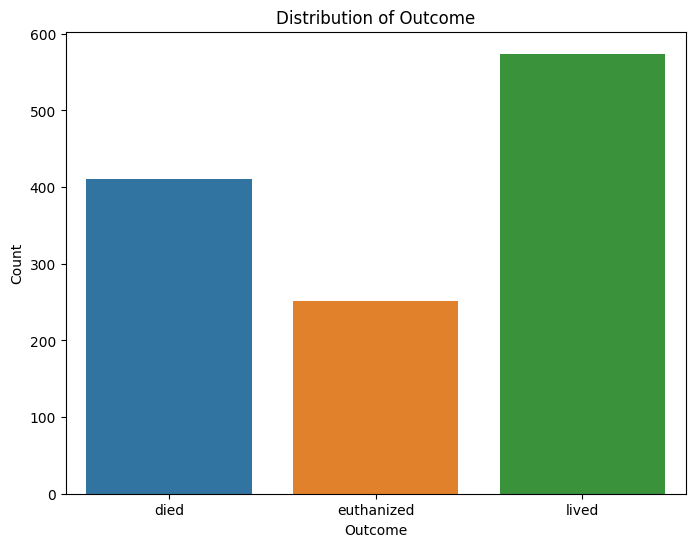

In [25]:
# Visualize the distribution of target variable 
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='outcome', data=df, hue='outcome')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


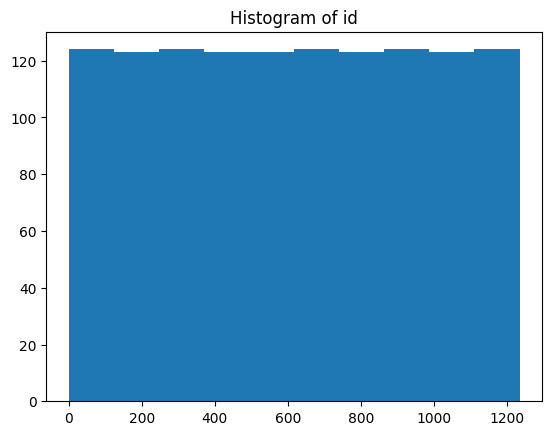

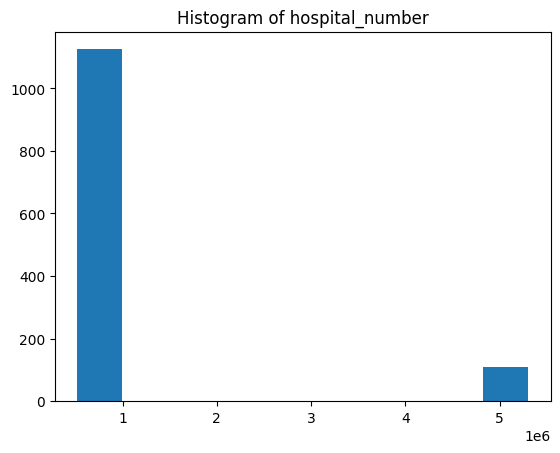

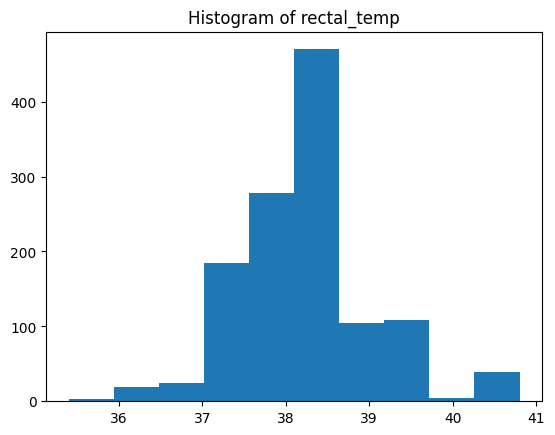

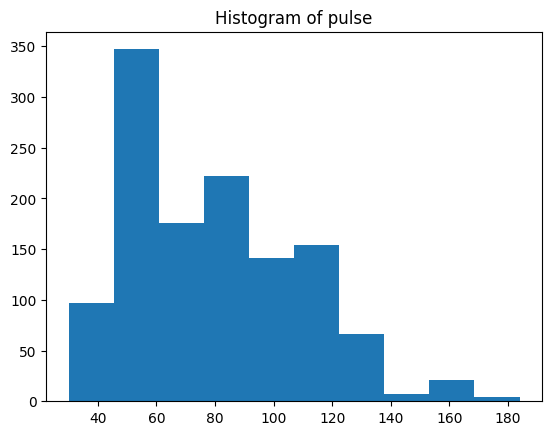

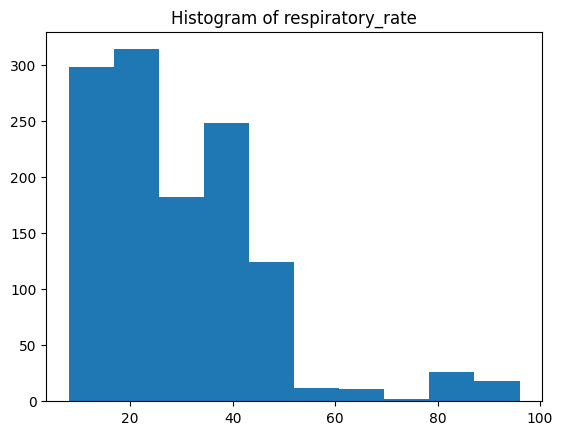

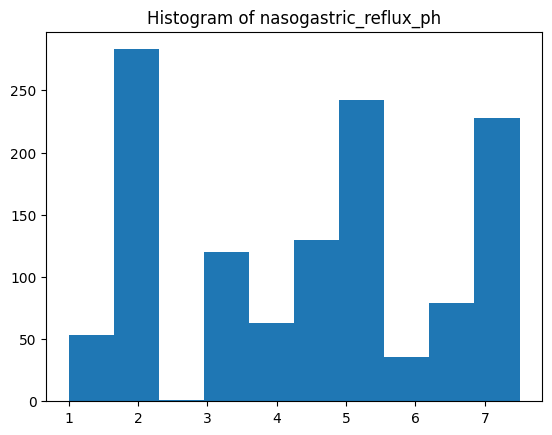

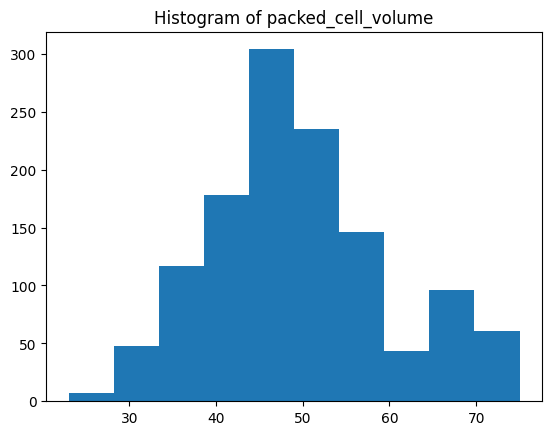

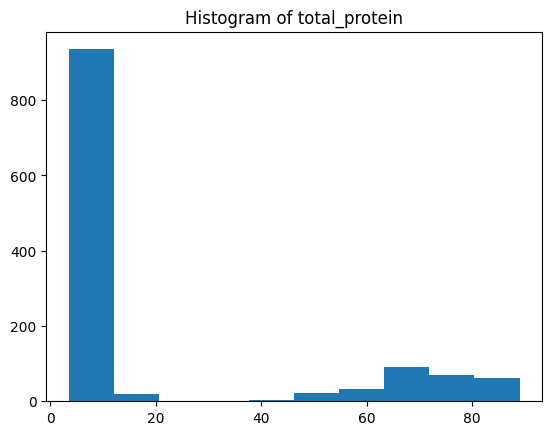

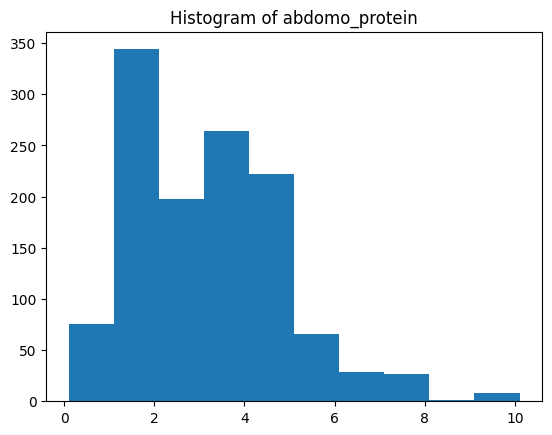

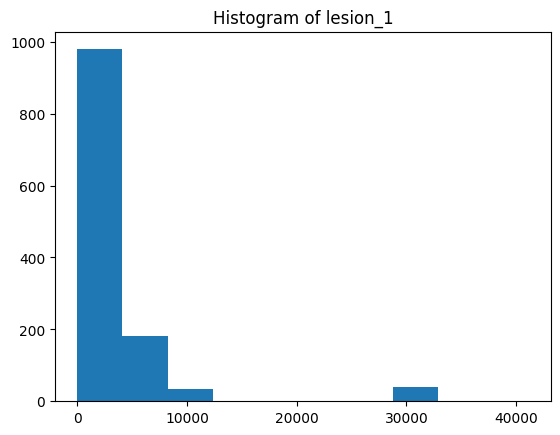

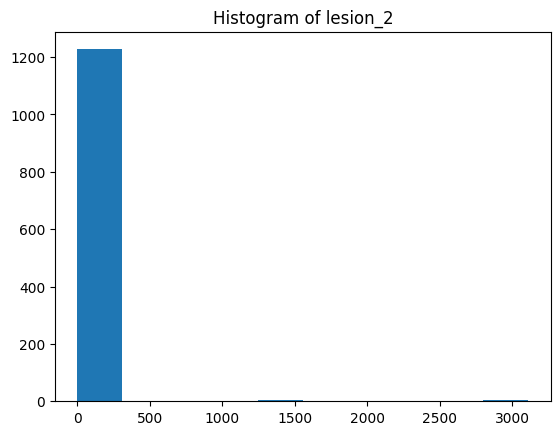

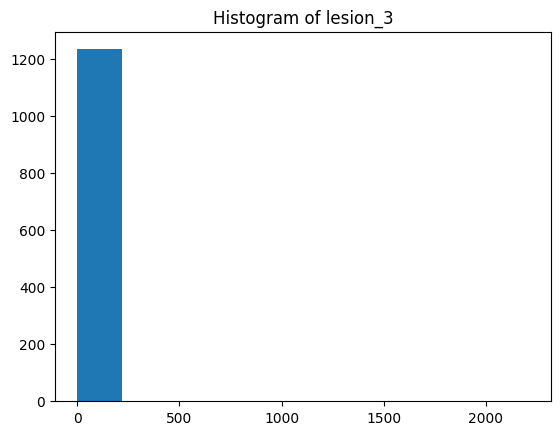

In [22]:
#Creating a histogram for each numeric col
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.hist(df[col])
    plt.title(f"Histogram of {col}")
    plt.show()

columns that have too many unique values: ['id', 'hospital_number', 'lesion_1']


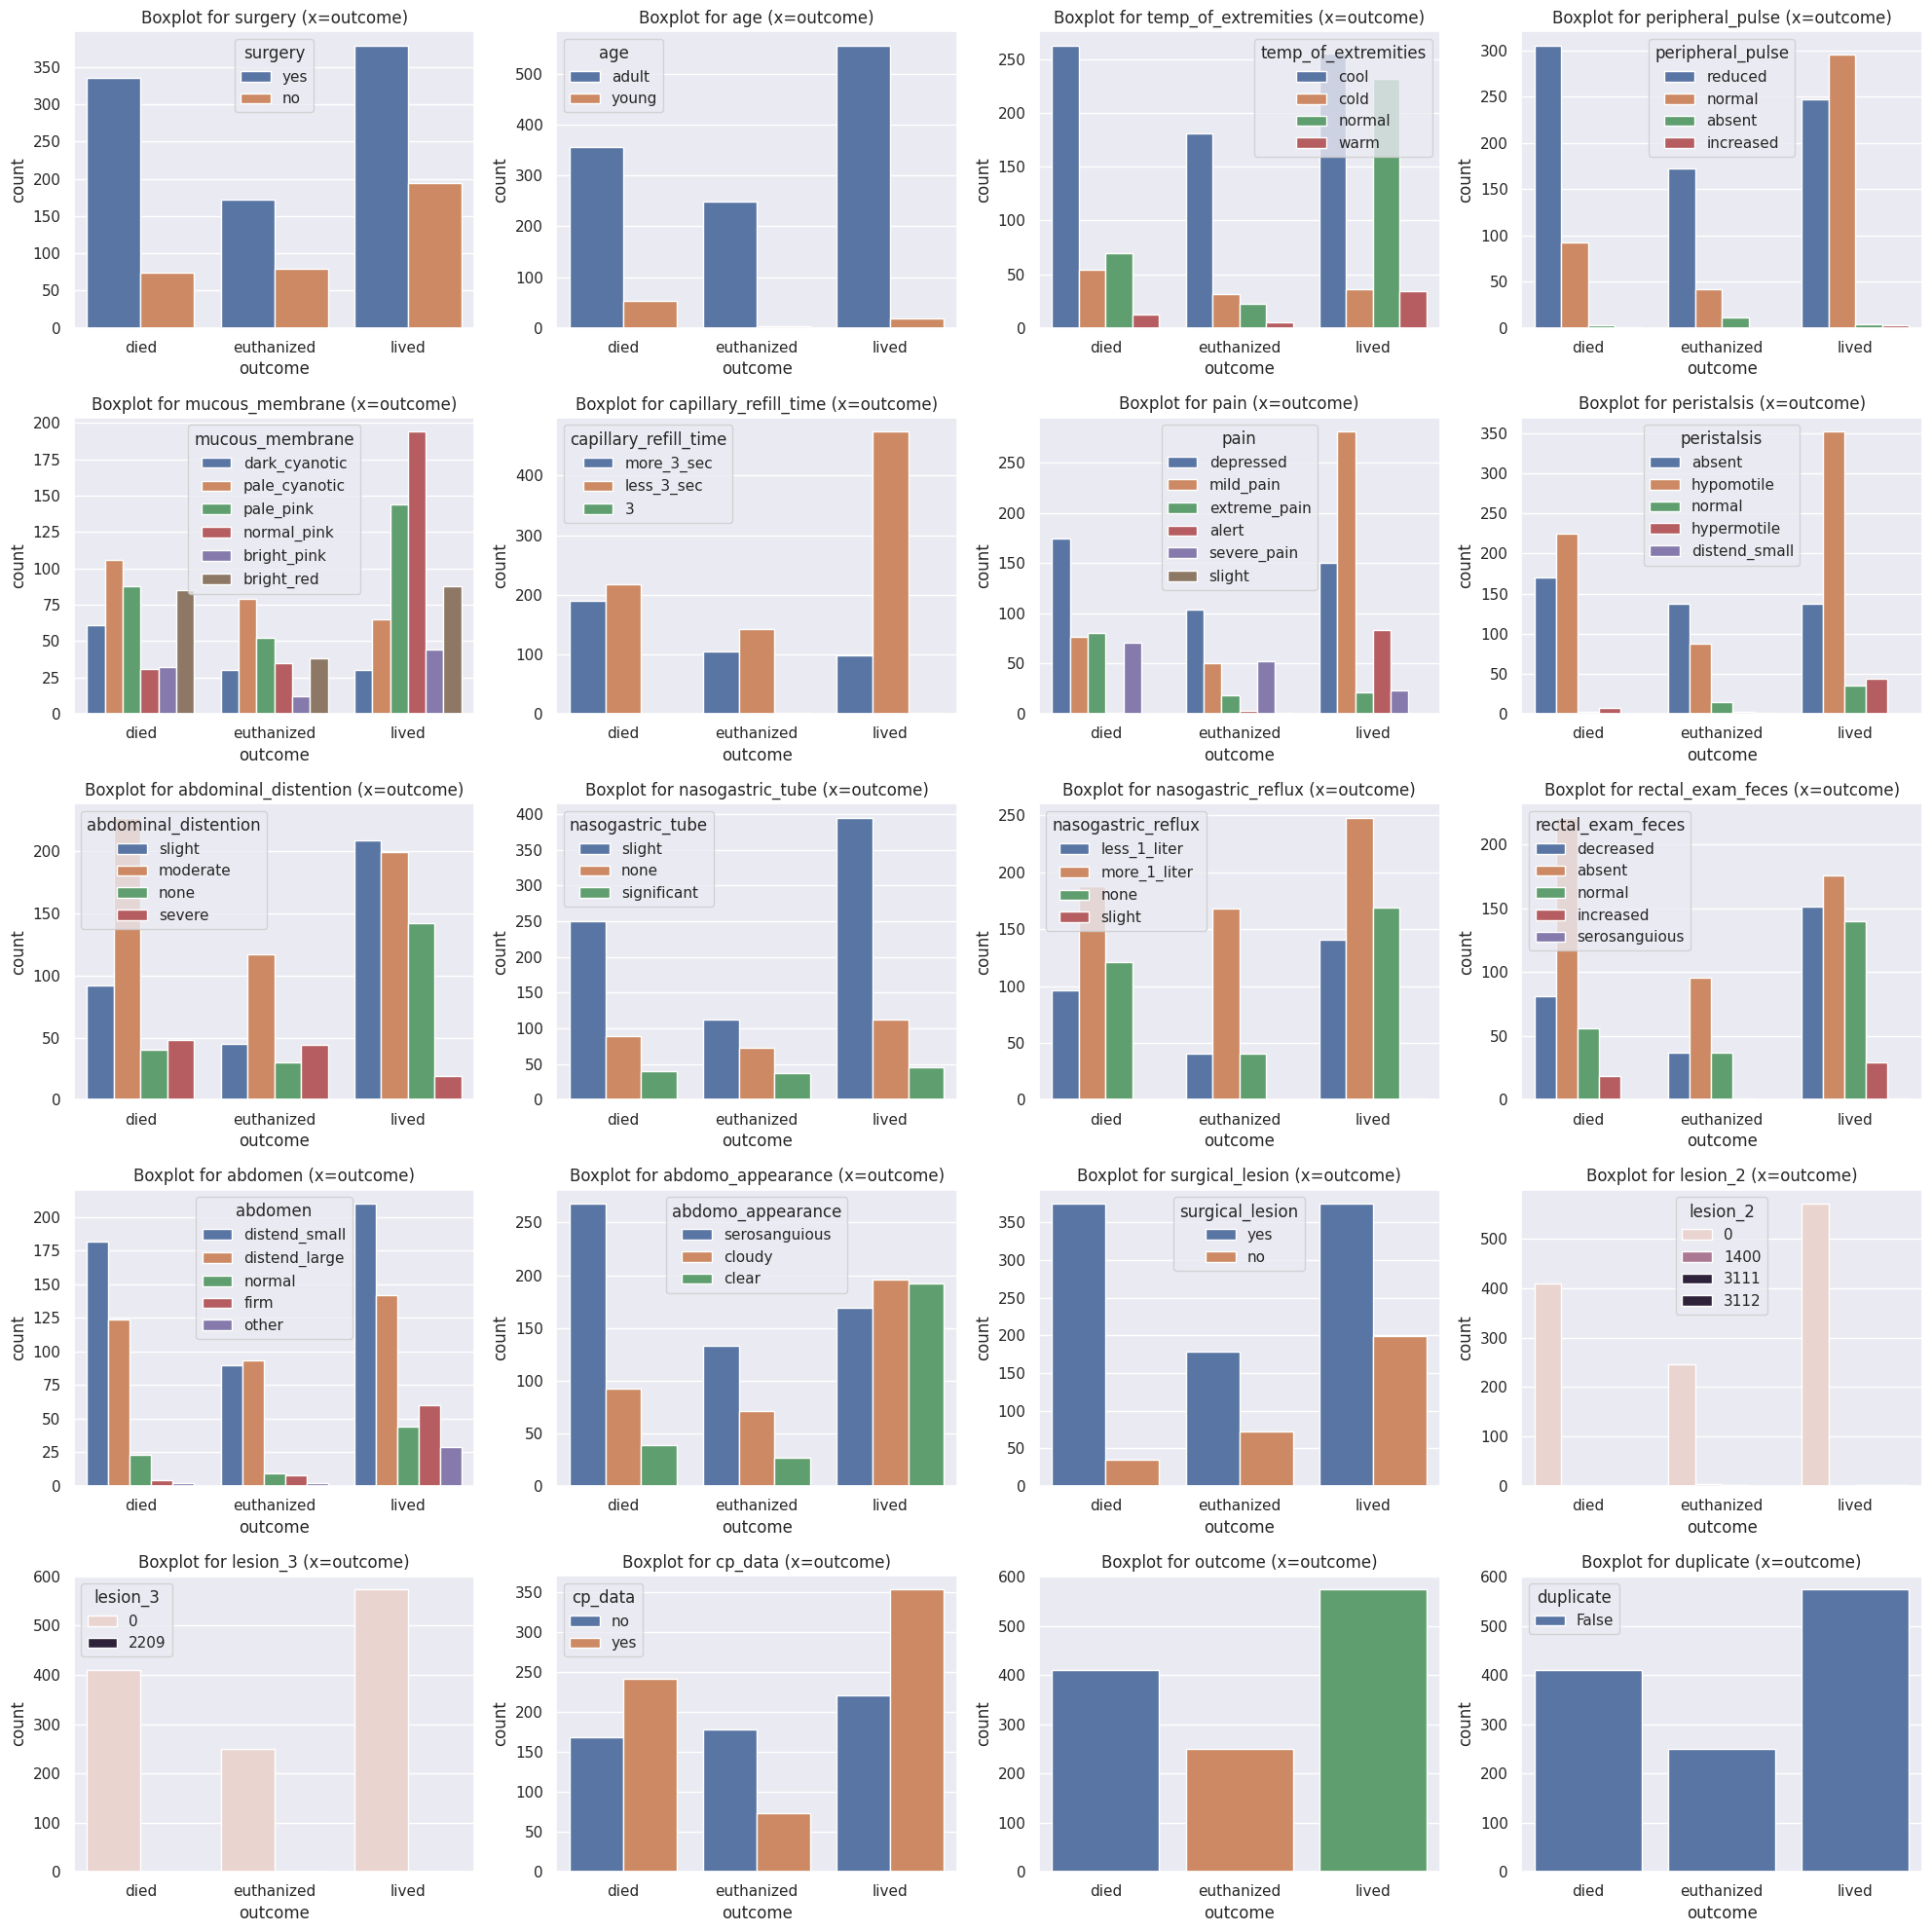

In [26]:
import math
cat_col=[i for i in df.columns if df[i].dtypes!=float]

sns.set(style="darkgrid")

cat_plot=[i for i in cat_col if df[i].nunique()<=8]
print('columns that have too many unique values:',[i for i in cat_col if i not in cat_plot])
target='outcome'

# Calculate the number of rows and columns required for the grid
n = len(cat_plot)
cols = min(n, 4)
rows = math.ceil(n / cols)

# Create the subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))  # Adjust the figure size as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column name and corresponding axis
for i, (column, ax) in enumerate(zip(cat_plot, axes)):
    # Create the boxplot on the current axis
    sns.countplot(data=df, x=target, hue=column, ax=ax)
    ax.set_title(f"Boxplot for {column} (x={target})")

    # Hide empty subplots
    if i >= n:
        ax.set_axis_off()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

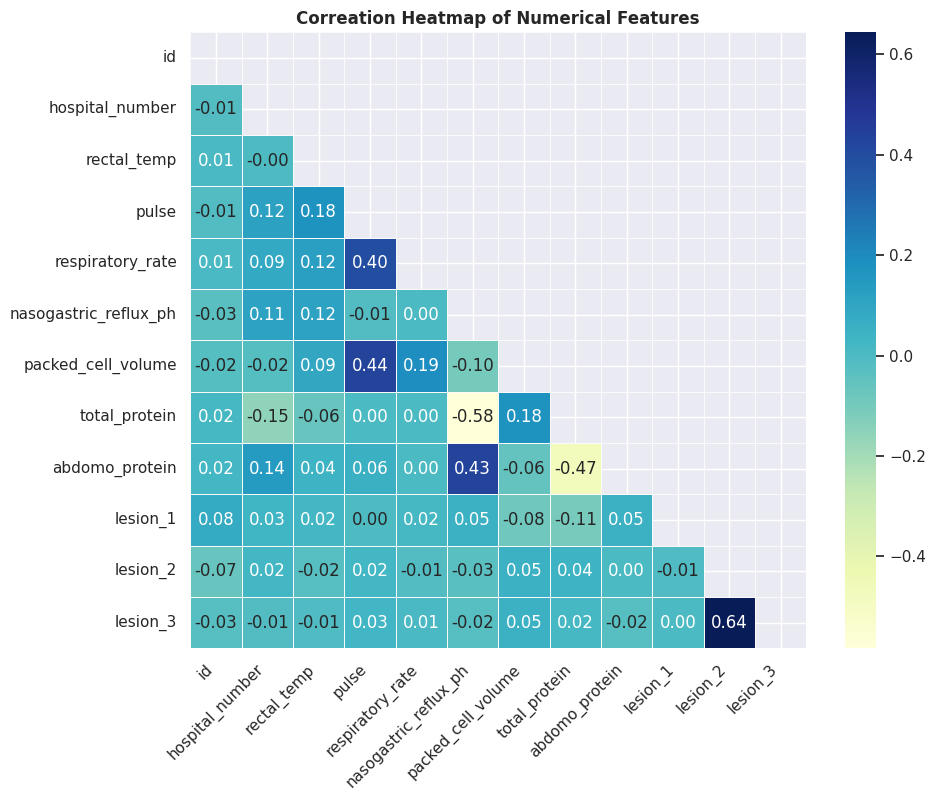

In [27]:
numerical_features = df.select_dtypes(include=[np.number])    
categorical_features = df.select_dtypes(include=['object', 'category'])

# Compute the correation matrix for numerical features
corr_matrix = df[numerical_features.columns].corr()
mask = np.triu(corr_matrix)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', mask=mask, linewidth=0.5, square=True, linecolor='#fafafa', fmt=".2f")

# Set plot title
plt.title('Correation Heatmap of Numerical Features', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.show()
